In [1]:
from environment import TennisEnv
from ddpg import DDPGAgent
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch
import os

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]
Epsiode 100	 Average Score 0.005
Epsiode 200	 Average Score 0.000
Epsiode 300	 Average Score 0.000
Epsiode 400	 Average Score 0.000
Epsiode 500	 Average Score 0.001
Epsiode 600	 Average Score 0.000
Epsiode 700	 Average Score 0.000
Epsiode 800	 Average Score 0.004
Epsiode 90

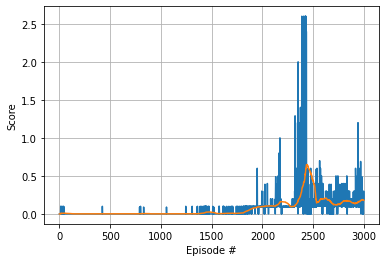

NameError: name 'avg_scores' is not defined

In [2]:
def train(n_episodes = 3000, max_t = 1000, log_every = 100, solved_score = 1.0):
    env = TennisEnv()
    agent = DDPGAgent(env.state_size, env.action_size, random_seed = 0)
    best_score = 0.5
    scores = []
    scores_window = deque(maxlen=100)
    scores_mean = []
    for i_episode in range(n_episodes):
        scores_array = np.zeros(env.num_agents)
        states, _ = env.reset()
        agent.reset()
        
        for episode_t in range(max_t):
            actions = agent.act(states)
            next_states, rewards, dones, _ = env.step(actions)
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores_array += rewards
            if np.any(dones):
                break
        
        current_episode_score = np.max(scores_array)
        scores_window.append(current_episode_score)
        current_score = np.mean(scores_window)
        scores.append(current_episode_score)
        scores_mean.append(current_score)
        
        print ("\rEpisode {:}\t Average Score {:.3f}".format(i_episode, current_score), end="")
        
        if i_episode % log_every == 0 and i_episode > 1:
            print ("\rEpsiode {:}\t Average Score {:.2f}".format(i_episode, current_score))
        if current_score > best_score and i_episode > 100:
            print ("\rSaving agent in Epsiode {:}\t Average Score {:.2f}".format(i_episode, current_score))
            torch.save(agent.actor.state_dict(), 'checkpoints/checkpoint_actor1.pth')
            torch.save(agent.critic.state_dict(), 'checkpoints/checkpoint_critic1.pth')
            best_score = current_score
        if current_score > solved_score:
            print ("\nEnvironment solved in {:d} episodes!\tAverage Score: {:3f}".format(i_episode-100, current_score))
            break
    env.close()       
    return scores, scores_mean, agent
    
scores, scores_mean, agent = train()  


fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores_mean)), scores_mean)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()